In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
from datetime import datetime 

df3 = pd.read_csv(r"\Users\ademzemni\neuefische\DA-Project1_Muesli")


df = pd.read_csv("5 - Muesli Project raw data - Orders.csv", header = 1)
df2 = pd.read_csv("5 - DF2 Muesli Project raw data - Order Process Data.csv")
#functions
#get weekday
def weekday(date):  
    return calendar.day_name[date.weekday()] 

#Adding days to date
def add_days_to_date(date,days):
    return date + datetime.timedelta(days=days)




In [62]:
df3 

,index,order_id,order_date,customer_id,customer_name,origin_channel,country/region,city,state,postal_code,...,quantity,discount,profit,ship_mode,order_date_weekday,order_express_considered,order_leaving_warehouse,order_leaving_warehouse_weekday,delivery_day,delivery_time[days]
0,27,CA-2019-121755,2019-01-16,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,...,3,0.0,11.7741,Standard Processing,Wednesday,2019-01-19,2019-01-19,Saturday,2019-01-24,8 days
1,27,CA-2019-121755,2019-01-16,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,...,3,0.0,11.7741,Standard Processing,Wednesday,2019-01-19,2019-01-19,Saturday,2019-01-24,8 days
2,45,CA-2019-118255,2019-03-11,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,...,2,0.0,19.7714,Express,Monday,2019-03-12,2019-03-12,Tuesday,2019-03-18,7 days
3,45,CA-2019-118255,2019-03-11,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,...,2,0.0,19.7714,Express,Monday,2019-03-12,2019-03-12,Tuesday,2019-03-18,7 days
4,48,CA-2019-169194,2019-06-20,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,...,3,0.0,4.9500,Standard Processing,Thursday,2019-06-23,2019-06-23,Sunday,2019-06-27,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21615,9948,CA-2020-121559,2020-06-01,HW-14935,Helen Wasserman,Sales,United States,Indianapolis,Indiana,46203.0,...,6,0.0,539.2464,Standard Processing,Monday,2020-06-04,2020-06-04,Thursday,2020-06-08,7 days
21616,9948,CA-2020-121559,2020-06-01,HW-14935,Helen Wasserman,Sales,United States,Indianapolis,Indiana,46203.0,...,6,0.0,539.2464,Standard Processing,Monday,2020-06-04,2020-06-04,Thursday,2020-06-08,7 days
21617,9948,CA-2020-121559,2020-06-01,HW-14935,Helen Wasserman,Sales,United States,Indianapolis,Indiana,46203.0,...,6,0.0,539.2464,Standard Processing,Monday,2020-06-04,2020-06-04,Thursday,2020-06-08,7 days
21618,9948,CA-2020-121559,2020-06-01,HW-14935,Helen Wasserman,Sales,United States,Indianapolis,Indiana,46203.0,...,6,0.0,539.2464,Standard Processing,Monday,2020-06-04,2020-06-04,Thursday,2020-06-08,7 days


In [ ]:
df = pd.read_csv("5 - Muesli Project raw data - Orders.csv", header = 1)
warehouse_workdays = ["Monday", "Tuesday","Wednesday","Thursday","Friday"]
transport_workdays = ["Monday","Wednesday","Friday"]
warehousestorage_time = 1
warehouse_prep_time = 2
express = warehousestorage_time
no_express = warehousestorage_time + warehouse_prep_time

In [ ]:
#adjust column names
df.columns = df.columns.str.replace(" ","_")
df.columns = map(str.lower, df.columns)

In [ ]:
#adjust column names
df2.columns = df2.columns.str.replace(" ","_")
df2.columns = map(str.lower, df2.columns)

In [ ]:
#merging both df
df = df.drop('ship_mode', axis=1)
df2 = df2[['order_id', 'ship_mode']]
df = df.merge(df2, on='order_id', how='left')

df.head()

In [ ]:
#order date into date
df["order_date"] = df["order_date"].apply(lambda date: datetime.strptime(str(date), "%d/%m/%Y"))

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
#create column: Weekdays of order_date
df["order_date_weekday"] = df["order_date"].apply(lambda date: weekday(date))

In [ ]:
#check
df.order_date_weekday.unique()

In [ ]:
#delivery day: adding days whether express or not
import datetime
df["order_express_considered"] = df.apply(lambda x: add_days_to_date(x["order_date"],express) if x["ship_mode"] == "First Class" else add_days_to_date(x["order_date"],no_express), axis = 1 )

In [ ]:
#delivery day: adding days whether order date is on warehouse workdays
df["order_leaving_warehouse"] = df.apply(lambda x: add_days_to_date(x["order_express_considered"],days =2) if x["order_date_weekday"] == "Saturday" else add_days_to_date(x["order_express_considered"],days =1) if x["order_date_weekday"] == "Sunday" else x["order_express_considered"], axis = 1)

In [ ]:
#adding new weekday column for "order_leaving_warehouse"
df["order_leaving_warehouse_weekday"] = df["order_leaving_warehouse"].apply(lambda date: weekday(date))

In [ ]:
#delivery day: adding days considering logistics
df["delivery_day"] = df.apply(lambda x: add_days_to_date(x["order_leaving_warehouse"],days =5) if x["order_leaving_warehouse_weekday"] == "Wednesday" else add_days_to_date(x["order_leaving_warehouse"],days =3) if x["order_leaving_warehouse_weekday"] == "Monday" else add_days_to_date(x["order_leaving_warehouse"],days =6) if x["order_leaving_warehouse_weekday"] == "Tuesday" else add_days_to_date(x["order_leaving_warehouse"],days =4) if x["order_leaving_warehouse_weekday"] == "Thursday" else add_days_to_date(x["order_leaving_warehouse"],days =3) if x["order_leaving_warehouse_weekday"] == "Friday" else add_days_to_date(x["order_leaving_warehouse"],days =5) if x["order_leaving_warehouse_weekday"] == "Saturday" else add_days_to_date(x["order_leaving_warehouse"],days =4) if x["order_leaving_warehouse_weekday"] == "Sunday" else "", axis = 1)

In [ ]:
#delivery_time calculation
df["delivery_time[days]"] = df.apply(lambda x : x["delivery_day"] - x["order_date"], axis = 1)

In [ ]:
#delivery day: adding days considering logistics
df["delivery_day"] = df.apply(lambda x: add_days_to_date(x["order_leaving_warehouse"],days =5) if x["order_leaving_warehouse_weekday"] == "Wednesday" else add_days_to_date(x["order_express_considered"],days =1) if x["order_date_weekday"] == "Sunday" else x["order_express_considered"], axis = 1)

In [ ]:
#check
df.ship_mode.unique()

In [ ]:
#check
df.head(10)

In [63]:
# which day generate the most profit

df.groupby('order_date_weekday').sum()['profit'].reset_index()

KeyError: 'order_date_weekday'

In [64]:
df = pd.read_csv(r"\Users\ademzemni\neuefische\DA-Project1_Muesli")

In [65]:
df.groupby(['order_date_weekday', 'region']).sum()['profit'].sort_values().reset_index()

,order_date_weekday,region,profit
0,Sunday,Central,-7927.7187
1,Saturday,Central,7021.2601
2,Saturday,East,7205.1843
3,Monday,East,7500.6873
4,Friday,South,7949.2914
5,Friday,Central,9137.5259
6,Sunday,South,10537.5718
7,Saturday,South,10718.6694
8,Monday,South,11015.3383
9,Thursday,South,11641.7044


In [66]:
#  Days, ship_mode, deiverytime sorted by profit

df.groupby(['delivery_time[days]', 'order_date_weekday', 'ship_mode']).sum()['profit'].sort_values().reset_index()

,delivery_time[days],order_date_weekday,ship_mode,profit
0,6 days,Friday,Express,2952.2781
1,5 days,Wednesday,Express,5873.8385
2,9 days,Saturday,Express,6546.1254
3,8 days,Sunday,Express,9163.2961
4,9 days,Saturday,Standard Processing,13515.7978
5,6 days,Tuesday,Express,22708.4514
6,7 days,Monday,Express,30634.9776
7,4 days,Thursday,Express,32502.5130
8,7 days,Monday,Standard Processing,42351.9406
9,8 days,Sunday,Standard Processing,47151.5364


In [67]:
#  Profit per region

df.groupby('region').sum()['profit'].sort_values().reset_index()

,region,profit
0,South,97680.5816
1,Central,113602.3954
2,East,197237.2926
3,West,230026.1896


In [68]:
# Discount per region

df.groupby('region').sum()['discount'].sort_values().reset_index()

,region,discount
0,South,495.95
1,West,796.25
2,East,898.50
3,Central,1116.04


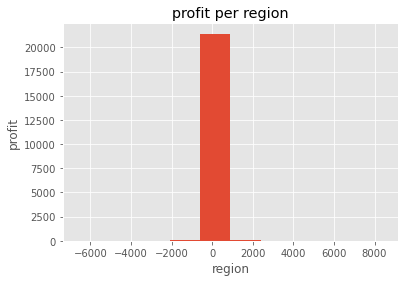

In [75]:

plt.style.use('ggplot') 
plt.figure(figsize=(6, 4))
plt.hist(x = df['profit'])

# Label your axes
plt.xlabel("region")
plt.ylabel("profit")

# Set title
plt.title("profit per region")

# Show graphic
plt.show()

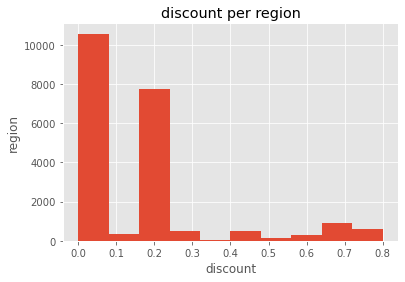

In [73]:

plt.style.use('ggplot') 
plt.figure(figsize=(6, 4))
plt.hist(x = df['discount'])

# Label your axes
plt.xlabel("discount")
plt.ylabel("region")

# Set title
plt.title("discount per region")

# Show graphic
plt.show()